# Dataset: Credit Card Approval Prediction
https://www.kaggle.com/rikdifos/credit-card-approval-prediction
Accessed 01-11-2020

In [2]:
# import libraries and data
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
applications_df = pd.read_csv('application_record.csv')

In [5]:
credit_df = pd.read_csv('credit_record.csv')

## Data Prep & Cleaning

In [9]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [10]:
applications_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
# view application data dimensions and types
# we see that application dataset has 12 categorical series & 5 numeric
applications_df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [8]:
# view credit data dimensions and types
# we see that "ID" is the primary key between datasets, but that within first few records there are duplicates

# "months_balance" (numeric) description: "The month of the extracted data is the starting point, backwards, 
# 0 is the current month, -1 is the previous month, and so on"

# "status" (categorical) description: "0: 1-29 days past due 1: 30-59 days past due 
# 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days 
# C: paid off that month X: No loan for the month"

credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
# How many months back is included in credit dataset?
credit_df.MONTHS_BALANCE.min()

-60

In [11]:
# What % of total records falls into each credit status?
credit_df['STATUS'].value_counts(normalize=True) * 100

C    42.155401
0    36.537205
X    19.953747
1     1.057626
5     0.161457
2     0.082779
3     0.030518
4     0.021267
Name: STATUS, dtype: float64

In [12]:
# before datasets can be merged
# view info and unique values in primary key "ID"
print(applications_df['ID'].nunique())
print('')
applications_df.info()

438510

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAI

In [13]:
# before datasets can be merged
# view info and unique values in primary key "ID"
print(credit_df['ID'].nunique())
print('')
credit_df.info()

45985

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [14]:
# we see that credit_df has a long structure, with 45985 unique values in 1048575 rows (applications_df has minimal duplication)
# identify how many IDs are common to both datasets (36457)
len(set(applications_df['ID']).intersection(set(credit_df['ID'])))

36457

In [15]:
# merge datasets on shared IDs
id_index = list(set(applications_df['ID']).intersection(set(credit_df['ID'])))
len(id_index)

36457

In [16]:
applications_df = applications_df[applications_df['ID'].isin(id_index)]
print(applications_df.shape)

(36457, 18)


In [17]:
df = applications_df.merge(credit_df, how='left', left_on='ID', right_on='ID')
print(df.shape)
print('')
print(df['ID'].nunique())
print('')
df.head()

(777715, 20)

36457



,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [15]:
# proposed reshaping may include identifying which status' we want to predict
# then dropping excluded status'
# then grouping "MONTHS_BALANCE" into 0-60 days overdue, 60-120 days overdue, etc.
# using co-horts of # of months since account opened

In [14]:
# proposed next steps may include further de-duplication and/or reshaping

In [18]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [36]:
# add column for age in years
df['age'] = df['DAYS_BIRTH']/-365
df.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,age
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,0,C,32.890411
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-1,C,32.890411


In [37]:
# add column for years in workforce
df['years_working'] = df['DAYS_EMPLOYED']/-365
df.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,age,years_working
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,0,C,32.890411,12.443836
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,-1,C,32.890411,12.443836


## Visual Data Exploration

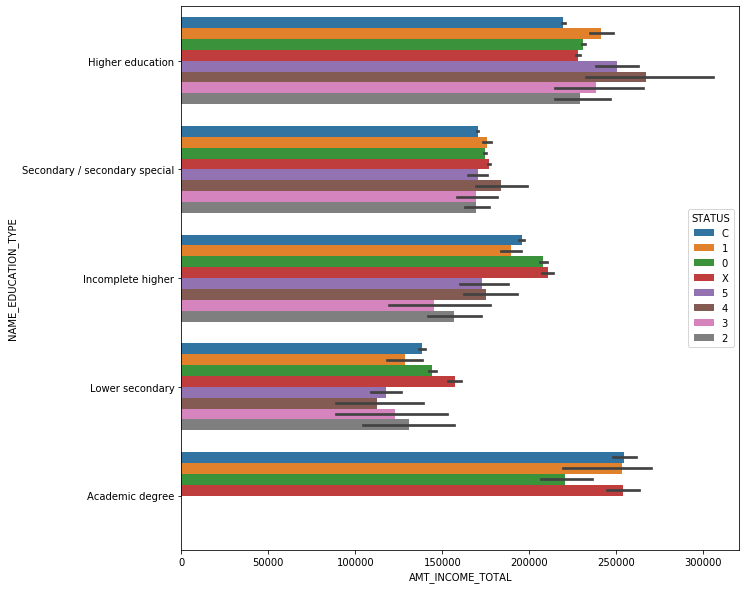

In [17]:
# How do income and education relate to credit status?
plt.figure(figsize=(10,10))
sns.barplot(x="AMT_INCOME_TOTAL", y="NAME_EDUCATION_TYPE", hue="STATUS", data=df)

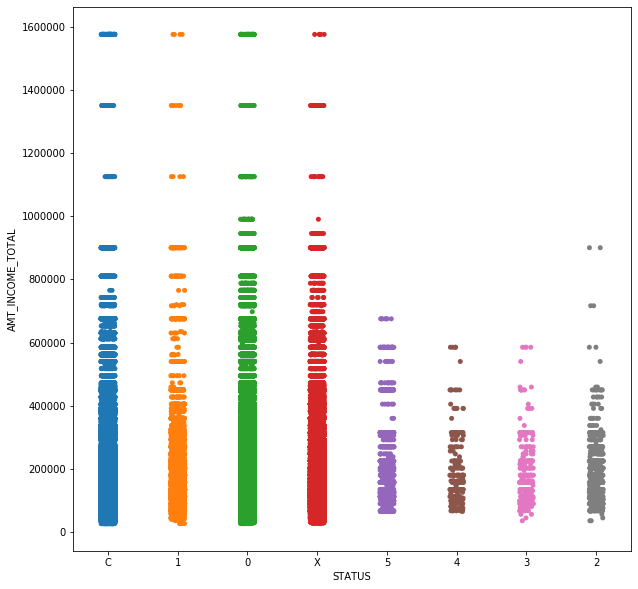

In [18]:
plt.figure(figsize=(10,10))
sns.stripplot(x="STATUS", y="AMT_INCOME_TOTAL", data=df, jitter=True)

<Figure size 360x1080 with 0 Axes>

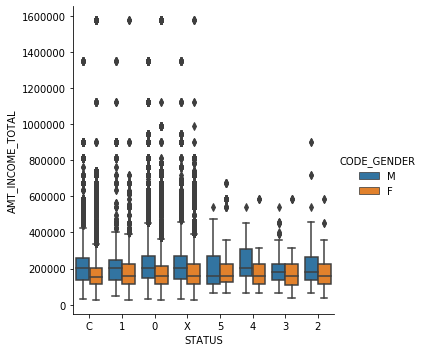

In [22]:
plt.figure(figsize=(5,15))
sns.catplot(x="STATUS", y="AMT_INCOME_TOTAL", hue="CODE_GENDER", kind="box", data=df)

In [40]:
# create subset risky_df to look for relationships within only "high risk"
# "high risk" = at any point in time had status 90 days or more overdue
risky = ['3', '4', '5']
risky_df = df.loc[df['STATUS'].isin(risky)]

# narrow down to fields of interest
risky_df = risky_df.drop(columns=['ID', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'MONTHS_BALANCE', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'NAME_FAMILY_STATUS'])
risky_df.head(3)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,age,years_working
13663,F,N,N,0,238500.0,Working,Secondary / secondary special,House / apartment,Laborers,2.0,5,52.890411,9.030137
13664,F,N,N,0,238500.0,Working,Secondary / secondary special,House / apartment,Laborers,2.0,5,52.890411,9.030137
13665,F,N,N,0,238500.0,Working,Secondary / secondary special,House / apartment,Laborers,2.0,5,52.890411,9.030137


In [ ]:
# Can relationships better be identified within "Risky Subset"?

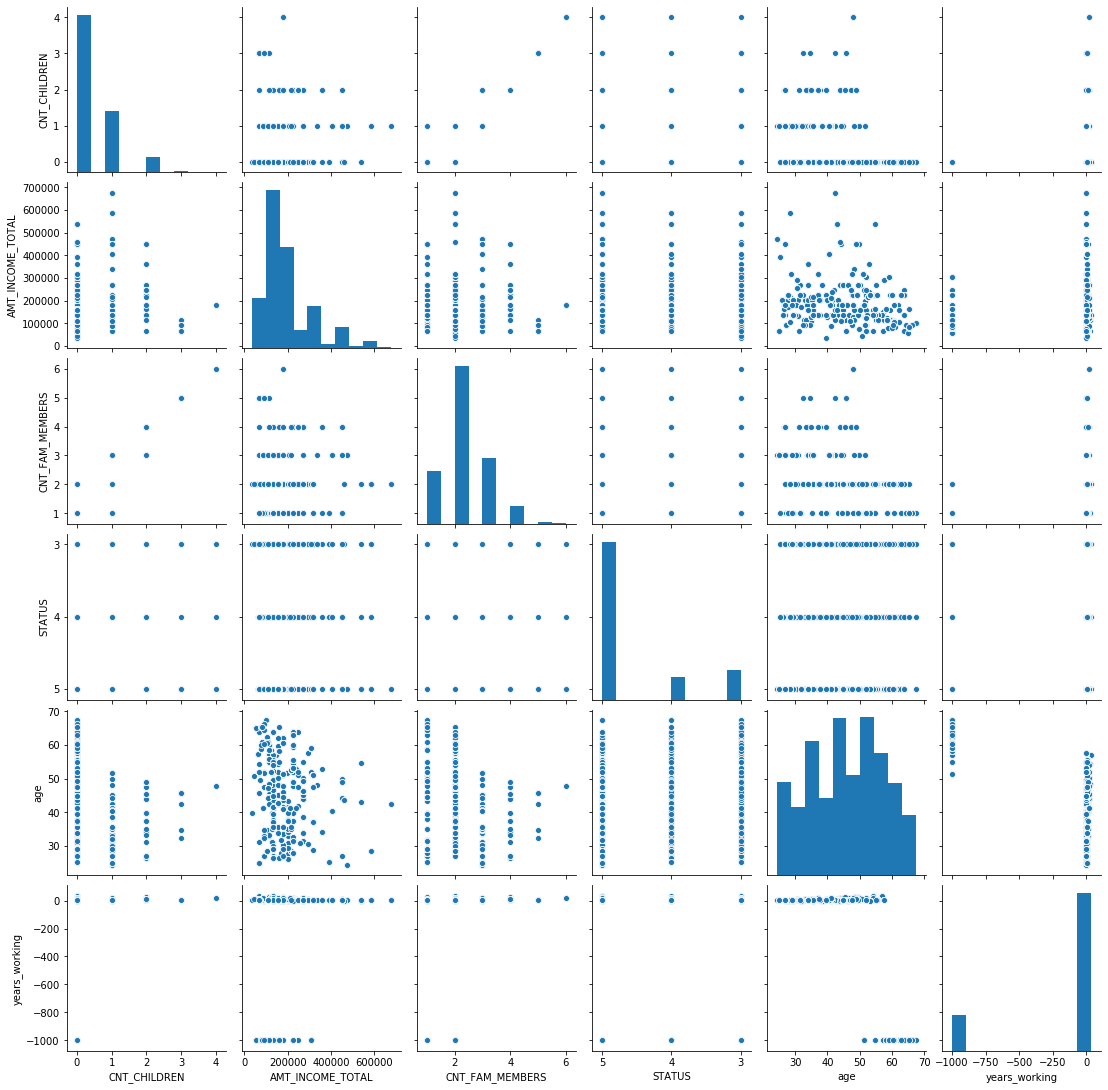

In [41]:
# Within risky subset, where can relationships be identified?
sns.pairplot(risky_df)

<Figure size 720x720 with 0 Axes>

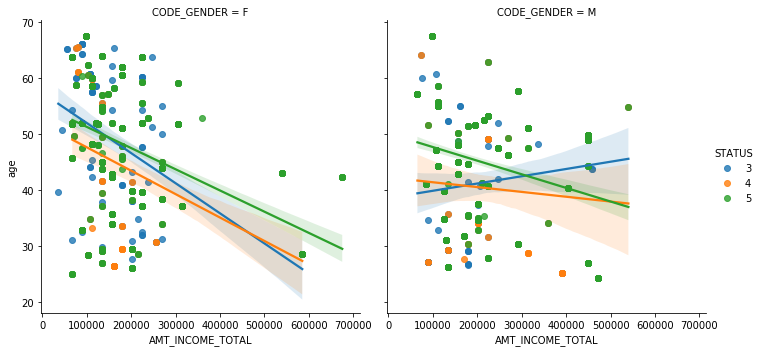

In [42]:
# Within risky subset, what are the relationships between education, income, gender, and credit status?
plt.figure(figsize=(10, 10))
sns.lmplot(x="AMT_INCOME_TOTAL", y="age", hue="STATUS", col="CODE_GENDER", data=risky_df)

## EDA & Vintage Analysis

In [23]:
grouped = credit_df.groupby('ID')
### convert credit_df data to wide format which every ID is a row
credit_pv = credit_df.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
credit_pv['open_month'] = grouped['MONTHS_BALANCE'].min() # smallest value of MONTHS_BALANCE, is the month when loan was granted
credit_pv['end_month'] = grouped['MONTHS_BALANCE'].max() # biggest value of MONTHS_BALANCE, might be observe over or canceling account
credit_pv['ID'] = credit_pv.index
credit_pv = credit_pv[['ID', 'open_month', 'end_month']]
credit_pv['window'] = credit_pv['end_month'] - credit_pv['open_month'] # calculate observe window
credit_pv.reset_index(drop = True, inplace = True)
credit = pd.merge(credit_df, credit_pv, on = 'ID', how = 'left') 

In [28]:
credit.head(3)

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book
44,5001713,-21,X,-21,0,21,0,0
43,5001713,-20,X,-21,0,21,0,1
42,5001713,-19,X,-21,0,21,0,2


In [26]:
# join calculated information
credit0 = credit.copy()
credit = credit[credit['window'] > 20] # delete users whose observe window less than 20
# analyze > 60 days past due 
credit['status'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| 
                            (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) 
credit['status'] = credit['status'].astype(np.int8) # 1: overdue 0: not
# calculate month on book: how many months after opening account
credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month'] 
credit.sort_values(by = ['ID','month_on_book'], inplace = True)

##### denominator
# count how many users in every month the account was opened
denominator = credit_pv.groupby(['open_month']).agg({'ID': ['count']}) 
denominator.reset_index(inplace = True)
denominator.columns = ['open_month','sta_sum']

##### ventage table
vintage = credit.groupby(['open_month','month_on_book']).agg({'ID': ['count']}) 
vintage.reset_index(inplace = True)
vintage.columns = ['open_month','month_on_book','sta_sum'] 
vintage['due_count'] = np.nan
# delete aggerate column
vintage = vintage[['open_month','month_on_book','due_count']] 
# join sta_sum colun to vintage table
vintage = pd.merge(vintage, denominator, on = ['open_month'], how = 'left') 

In [30]:
for j in range(-60,1): # outer loop: month in which account was opened
    ls = []
    # inner loop time after the credit card was granted
    for i in range(0,61): 
        # get ID which satisfy the condition
        due = list(credit[(credit['status'] == 1) & (credit['month_on_book'] == i) & (credit['open_month'] == j)]['ID']) 
        # As time goes, add bad customers
        ls.extend(due) 
        # calculate non-duplicate ID numbers using set()
        vintage.loc[(vintage['month_on_book'] == i) & (vintage['open_month'] == j), 'due_count'] = len(set(ls)) 

# calculate cumulative % of bad customers
vintage['sta_rate']  = vintage['due_count'] / vintage['sta_sum']    

In [31]:
vintage

,open_month,month_on_book,due_count,sta_sum,sta_rate
0,-60,0,0.0,415,0.000000
1,-60,1,0.0,415,0.000000
2,-60,2,0.0,415,0.000000
3,-60,3,0.0,415,0.000000
4,-60,4,0.0,415,0.000000
...,...,...,...,...,...
1655,-21,17,15.0,858,0.017483
1656,-21,18,15.0,858,0.017483
1657,-21,19,15.0,858,0.017483
1658,-21,20,15.0,858,0.017483


In [32]:
# Using pivot to convert long data to wide data
### Vintage wide table
vintage_wide = vintage.pivot(index = 'open_month', columns = 'month_on_book', values = 'sta_rate')
vintage_wide

month_on_book,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
open_month,,,,,,,,,,,,,,,,,,,,,
-60,0.00000,0.000000,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.00000,0.000000,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.00000,0.000000,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.00000,0.000000,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
-55,0.00000,0.000000,0.002058,0.006173,0.012346,0.016461,0.022634,0.022634,0.022634,0.024691,...,0.045267,0.045267,0.045267,0.045267,0.045267,NaN,NaN,NaN,NaN,NaN
-54,0.00000,0.000000,0.000000,0.002137,0.004274,0.004274,0.006410,0.012821,0.012821,0.017094,...,0.032051,0.032051,0.032051,0.032051,NaN,NaN,NaN,NaN,NaN,NaN
-53,0.00000,0.002028,0.002028,0.002028,0.004057,0.004057,0.008114,0.010142,0.010142,0.012170,...,0.028398,0.028398,0.028398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-52,0.00000,0.000000,0.007233,0.009042,0.009042,0.009042,0.012658,0.012658,0.014467,0.016275,...,0.023508,0.023508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


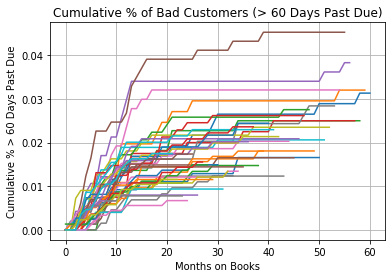

In [33]:
# plot vintage line chart
vintage0 = vintage_wide.replace(0,np.nan)
lst = [i for i in range(0,61)]
vintage_wide[lst].T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers (> 60 Days Past Due)')
#plt.axvline(30)
#plt.axvline(25)
#plt.axvline(20)
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.show()

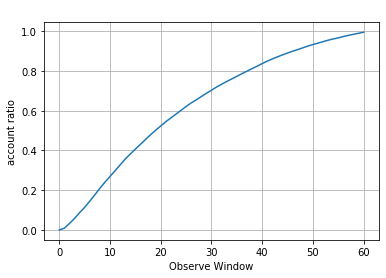

In [35]:
lst = []
for i in range(0,61):
    ratio = len(credit_pv[credit_pv['window'] < i]) / len(set(credit_pv['ID']))
    lst.append(ratio)
    
pd.Series(lst).plot(legend = False, grid = True, title = ' ')
plt.xlabel('Observe Window')
plt.ylabel('account ratio')
plt.show()

# References

https://www.kaggle.com/rikdifos/credit-card-approval-prediction/discussion/119320

https://www.kaggle.com/storrinha/st-00-data-exploration-v1